In [669]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
from collections import Counter
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import confusion_matrix

%matplotlib inline

In [670]:
users = pd.read_csv('takehome_users.csv',encoding ='latin-1')

In [671]:
users.head()

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0


In [672]:
#Converting objects t0 datetime column

In [673]:
users['creation_time'] = pd.to_datetime(users['creation_time'])
users['last_session_creation_time'] = pd.to_datetime(users['last_session_creation_time'], unit='s')
users.head()

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,2014-04-22 03:53:30,1,0,11,10803.0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,2014-03-31 03:45:04,0,0,1,316.0
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,2013-03-19 23:14:52,0,0,94,1525.0
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,2013-05-22 08:09:28,0,0,1,5151.0
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,2013-01-22 10:14:20,0,0,193,5240.0


In [674]:
#getting info about null values
users.isnull().sum()

object_id                        0
creation_time                    0
name                             0
email                            0
creation_source                  0
last_session_creation_time    3177
opted_in_to_mailing_list         0
enabled_for_marketing_drip       0
org_id                           0
invited_by_user_id            5583
dtype: int64

In [675]:
#handling of null values
users['invited_by_user_id'].fillna(0, inplace=True)


In [676]:
#impute last_session_creation_time with creation_time considering that as a last session creation time
users['last_session_creation_time'].fillna(users['creation_time'], inplace=True)


In [677]:
users.isnull().sum()

object_id                     0
creation_time                 0
name                          0
email                         0
creation_source               0
last_session_creation_time    0
opted_in_to_mailing_list      0
enabled_for_marketing_drip    0
org_id                        0
invited_by_user_id            0
dtype: int64

In [678]:
data1 = pd.read_csv('takehome_user_engagement.csv',encoding ='latin-1')

In [679]:
data1.isnull().sum()

time_stamp    0
user_id       0
visited       0
dtype: int64

In [680]:
#converting object to datetime
data1['time_stamp'] = pd.to_datetime(data1['time_stamp'])



In [681]:

#aggregate for weekly count
k=data1.groupby(['user_id', pd.Grouper(key='time_stamp', freq='W')])['visited'].count().reset_index().sort_values('user_id')



In [682]:
k = k.groupby('user_id')['visited'].max()

In [683]:
df = pd.DataFrame(k)

In [684]:
#create new cokumn where visites are more than 3

df['adopted'] = np.where(df.visited >= 3, 1,0)

In [685]:
df=df.reset_index()

In [686]:
df.columns

Index(['user_id', 'visited', 'adopted'], dtype='object')

In [687]:
final_df=pd.merge(users,df,left_on='object_id',right_on='user_id',how='left')

In [688]:
#merging of both dataframes
final_df.columns

Index(['object_id', 'creation_time', 'name', 'email', 'creation_source',
       'last_session_creation_time', 'opted_in_to_mailing_list',
       'enabled_for_marketing_drip', 'org_id', 'invited_by_user_id', 'user_id',
       'visited', 'adopted'],
      dtype='object')

In [689]:
#dropping of user id column
final_df=final_df.drop('user_id',axis=1)

In [690]:
#filling na values to zero where customer have no activity
final_df=final_df.fillna(0)

In [691]:
#checking of dataframe for null values
final_df.isnull().sum()

object_id                     0
creation_time                 0
name                          0
email                         0
creation_source               0
last_session_creation_time    0
opted_in_to_mailing_list      0
enabled_for_marketing_drip    0
org_id                        0
invited_by_user_id            0
visited                       0
adopted                       0
dtype: int64

# EDA

# Creation source

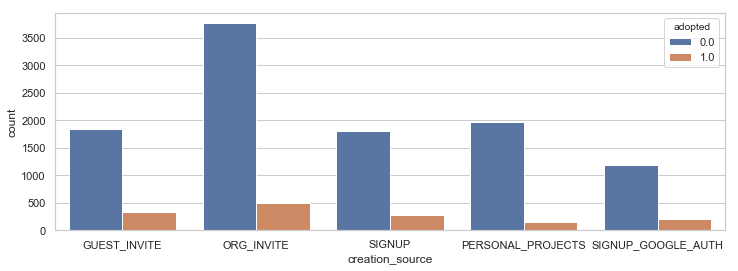

In [692]:
plt.figure(figsize=(12,4))
sns.countplot(x='creation_source', data=final_df, hue='adopted')

/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:1241: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(UserWarning(msg))
/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


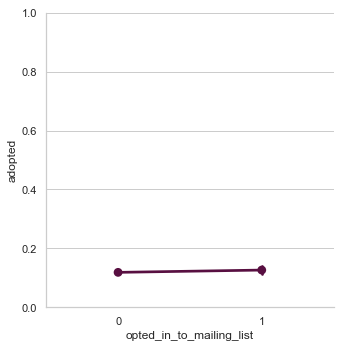

In [693]:
sns.set(style="whitegrid")
g = sns.PairGrid(data=final_df, x_vars=['opted_in_to_mailing_list'], y_vars='adopted', size=5)
g.map(sns.pointplot, color=sns.xkcd_rgb["plum"])
g.set(ylim=(0, 1))

/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:1241: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(UserWarning(msg))
/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


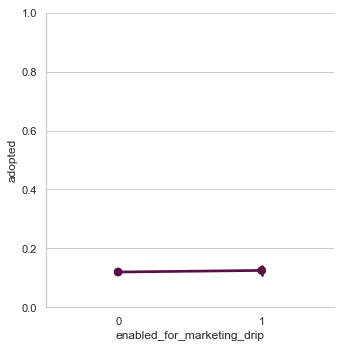

In [694]:
sns.set(style="whitegrid")
g = sns.PairGrid(data=final_df, x_vars=['enabled_for_marketing_drip'], y_vars='adopted', size=5)
g.map(sns.pointplot, color=sns.xkcd_rgb["plum"])
g.set(ylim=(0, 1))

In [695]:
#plot = final_df.plot.pie(y='creation_source', figsize=(5, 5))

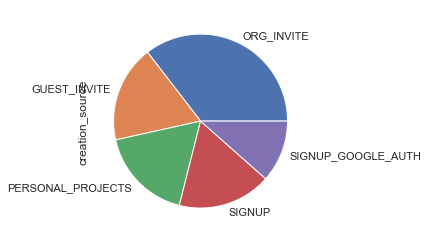

In [696]:
final_df['creation_source'].value_counts().plot(kind='pie')

/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:1241: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(UserWarning(msg))
/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


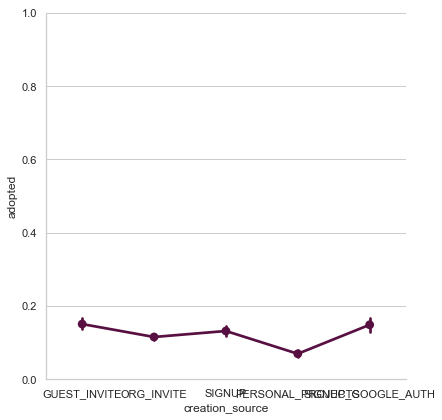

In [697]:
g = sns.PairGrid(data=final_df, x_vars=['creation_source'], y_vars='adopted', size=6)
g.map(sns.pointplot, color=sns.xkcd_rgb["plum"])
g.set(ylim=(0, 1))

In [698]:
final_df['email_domain'] = [x.split('@')[1] for x in final_df['email']]

In [699]:
final_df.head()

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,visited,adopted,email_domain
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,2014-04-22 03:53:30,1,0,11,10803.0,1.0,0.0,yahoo.com
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,2014-03-31 03:45:04,0,0,1,316.0,3.0,1.0,gustr.com
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,2013-03-19 23:14:52,0,0,94,1525.0,1.0,0.0,gustr.com
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,2013-05-22 08:09:28,0,0,1,5151.0,1.0,0.0,yahoo.com
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,2013-01-22 10:14:20,0,0,193,5240.0,1.0,0.0,yahoo.com


In [700]:
len(final_df.email_domain.unique())

1184

In [701]:
final_df['email_domain'].value_counts().head(15)

gmail.com         3562
yahoo.com         2447
jourrapide.com    1259
cuvox.de          1202
gustr.com         1179
hotmail.com       1165
oqpze.com            2
mumdc.com            2
dqwln.com            2
luque.com            2
xvnbr.com            2
rerwl.com            2
xybhi.com            2
qgjbc.com            2
ulwdv.com            1
Name: email_domain, dtype: int64

In [702]:
major_domains = ['gmail.com', 'yahoo.com', 'jourrapide.com', 'cuvox.de', 'gustr.com', 'hotmail.com']


In [703]:
df_email=final_df.loc[final_df['email_domain'].isin(major_domains)]



/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:1241: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(UserWarning(msg))
/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


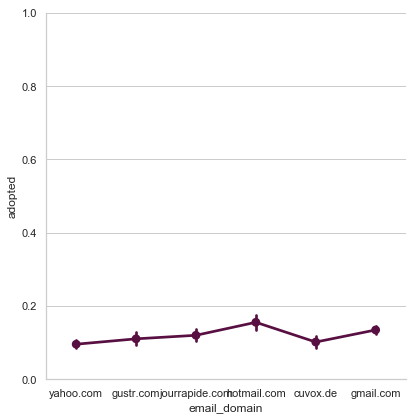

In [704]:
g = sns.PairGrid(data=df_email, x_vars=['email_domain'], y_vars='adopted', size=6)
g.map(sns.pointplot, color=sns.xkcd_rgb["plum"])
g.set(ylim=(0, 1))

In [705]:
#It is observed that email with hotmail domain is mostly used by adopted and yahoo os least used by adopted user.

# Lets Build classification Model to understand important factor

In [706]:
from sklearn import preprocessing,svm
from sklearn.preprocessing import StandardScaler
from sklearn import model_selection,metrics
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split,KFold,cross_val_score,cross_val_predict

In [734]:
final_df.head()

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,visited,adopted,email_domain
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,2014-04-22 03:53:30,1,0,11,10803.0,1.0,0.0,yahoo.com
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,2014-03-31 03:45:04,0,0,1,316.0,3.0,1.0,gustr.com
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,2013-03-19 23:14:52,0,0,94,1525.0,1.0,0.0,gustr.com
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,2013-05-22 08:09:28,0,0,1,5151.0,1.0,0.0,yahoo.com
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,2013-01-22 10:14:20,0,0,193,5240.0,1.0,0.0,yahoo.com


In [735]:
#
# Prepare date by dropping columns we dont need.
#
model_df = pd.DataFrame(final_df.drop(['name','email','invited_by_user_id','object_id','email_domain','visited'], axis=1))



In [736]:
model_df.head()

,creation_time,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,adopted
0,2014-04-22 03:53:30,GUEST_INVITE,2014-04-22 03:53:30,1,0,11,0.0
1,2013-11-15 03:45:04,ORG_INVITE,2014-03-31 03:45:04,0,0,1,1.0
2,2013-03-19 23:14:52,ORG_INVITE,2013-03-19 23:14:52,0,0,94,0.0
3,2013-05-21 08:09:28,GUEST_INVITE,2013-05-22 08:09:28,0,0,1,0.0
4,2013-01-17 10:14:20,GUEST_INVITE,2013-01-22 10:14:20,0,0,193,0.0


In [737]:
model_df.rename(columns={'creation_source':'cs'}, inplace=True)
model_df = pd.get_dummies(model_df, columns=['cs'], drop_first=True)


In [738]:
for col in ['last_session_creation_time','creation_time']:
    model_df["month_" + col] = model_df[col].dt.month
    model_df["day_" + col] = model_df[col].dt.day
    


In [739]:
#
# Drop the creation and last login columns.
#
model_df.drop('creation_time',  axis=1, inplace=True)
model_df.drop('last_session_creation_time',  axis=1, inplace=True)

#
# Print the head.
#
model_df.head()

,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,adopted,cs_ORG_INVITE,cs_PERSONAL_PROJECTS,cs_SIGNUP,cs_SIGNUP_GOOGLE_AUTH,month_last_session_creation_time,day_last_session_creation_time,month_creation_time,day_creation_time
0,1,0,11,0.0,0,0,0,0,4,22,4,22
1,0,0,1,1.0,1,0,0,0,3,31,11,15
2,0,0,94,0.0,1,0,0,0,3,19,3,19
3,0,0,1,0.0,0,0,0,0,5,22,5,21
4,0,0,193,0.0,0,0,0,0,1,22,1,17


In [740]:
target = model_df['adopted']
model_df.drop('adopted',  axis=1, inplace=True)

In [741]:
X_train, X_test, y_train, y_test = train_test_split(model_df, target, test_size=0.2, random_state=42, stratify=target)

In [742]:
classifier = GradientBoostingClassifier(verbose=True)
classifier.fit(X_train, y_train)
classifier.score(X_test, y_test)

      Iter       Train Loss   Remaining Time 
         1           0.6477            0.46s
         2           0.5967            0.47s
         3           0.5615            0.46s
         4           0.5290            0.44s
         5           0.5049            0.44s
         6           0.4717            0.43s
         7           0.4455            0.44s
         8           0.4348            0.46s
         9           0.4161            0.46s
        10           0.4011            0.46s
        20           0.3092            0.36s
        30           0.2576            0.30s
        40           0.2388            0.25s
        50           0.2238            0.20s
        60           0.2136            0.16s
        70           0.2024            0.12s
        80           0.1946            0.08s
        90           0.1869            0.04s
       100           0.1770            0.00s


0.9641666666666666

In [743]:
confusion_matrix(y_test, classifier.predict(X_test))


array([[2084,   27],
       [  59,  230]])

In [744]:
classifier.feature_importances_.shape


(11,)

In [745]:
features = pd.Series(classifier.feature_importances_)


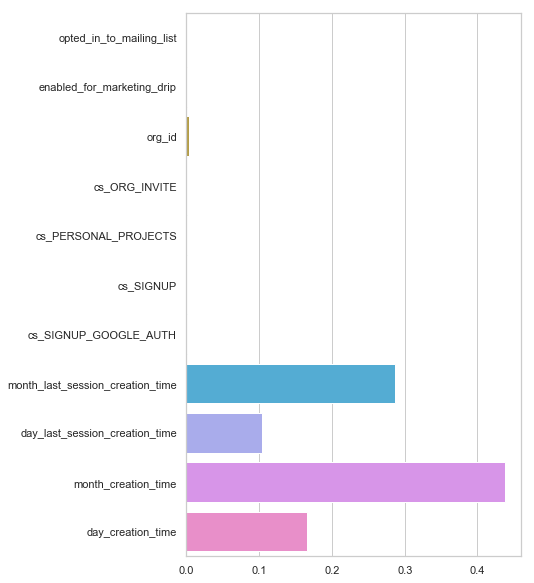

In [747]:
plt.figure(figsize=(6,10))
sns.barplot(y=X_train.columns, x=classifier.feature_importances_)

In [748]:
print(pd.DataFrame(classifier.feature_importances_, index = X_train.columns,
                   columns=['importance']).sort_values('importance', ascending=False))


                                  importance
month_creation_time                 0.438271
month_last_session_creation_time    0.286833
day_creation_time                   0.166251
day_last_session_creation_time      0.104395
org_id                              0.003309
enabled_for_marketing_drip          0.000365
cs_SIGNUP_GOOGLE_AUTH               0.000302
cs_PERSONAL_PROJECTS                0.000210
opted_in_to_mailing_list            0.000063
cs_ORG_INVITE                       0.000000
cs_SIGNUP                           0.000000


In [ ]:
# we can say that creation time and last session creation time plays major role in being customer as 'Adopted'